In [14]:
##### https://www.kaggle.com/datasets/mirichoi0218/insurance/data #####

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('/home/ml-abu-saleh-ml/JUPYTER/DATASETS/insurance.csv')

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [22]:
sex_map = {
    'female' : 0,
    'male' : 1
}

smoker_map = {
    'yes' : 1,
    'no' : 0
}

region_map = {
    'southwest' : 1,
    'southeast' : 2,
    'northwest' : 3,
    'northeast' : 4
}

df['sex'] = df['sex'].map(sex_map)
df['smoker'] = df['smoker'].map(smoker_map)
df['region'] = df['region'].map(region_map)

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


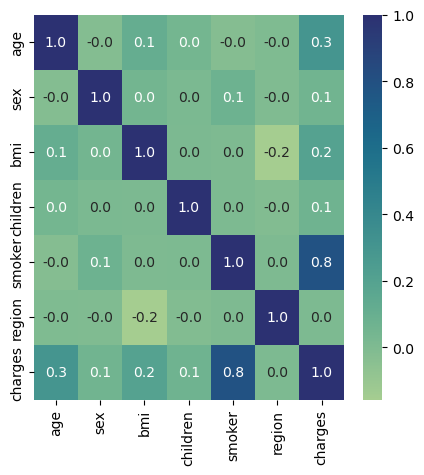

In [28]:
#correlation bettewn the variables
plt.figure(figsize=(5,5))

sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap="crest")

plt.show()

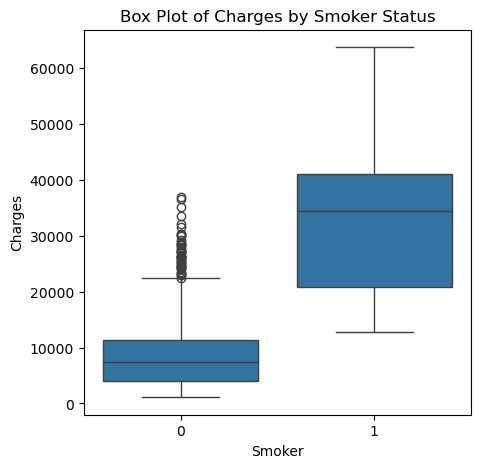

In [29]:
#box plot the variables are :- smoker , and the target variable (charges)
plt.figure(figsize=(5, 5))

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Box Plot of Charges by Smoker Status')
plt.xlabel('Smoker')  
plt.ylabel('Charges')  
plt.show()

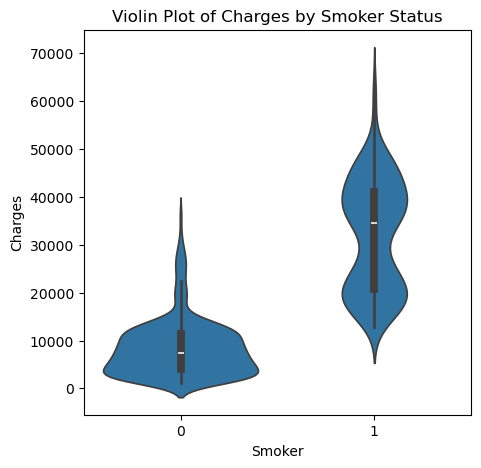

In [30]:
plt.figure(figsize=(5, 5))

# Violin Plot bettwen smoker, charges
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Violin Plot of Charges by Smoker Status')
plt.xlabel('Smoker') 
plt.ylabel('Charges')  
plt.show()

In [31]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

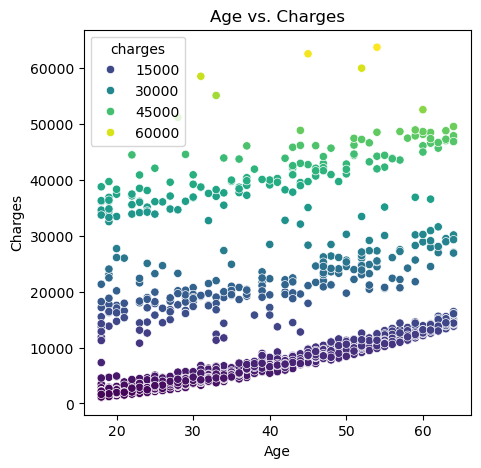

In [32]:
plt.figure(figsize=(5, 5))  

#Scatter plot bettwen age and charges

sns.scatterplot(x='age', y='charges', data=df, hue='charges', palette='viridis')
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.show()

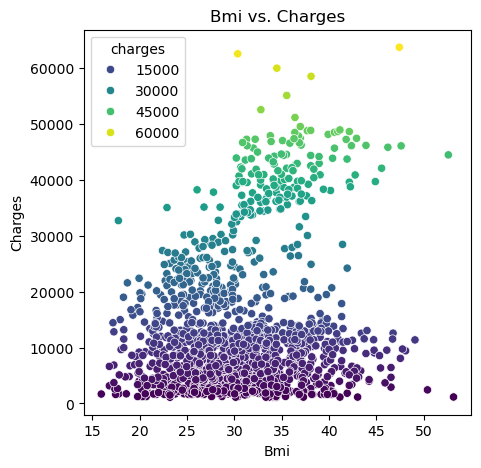

In [34]:
plt.figure(figsize=(5, 5))  

#Scatter plot bettwen age and charges

sns.scatterplot(x='bmi', y='charges', data=df, hue='charges', palette='viridis')
plt.title('Bmi vs. Charges')
plt.xlabel('Bmi')
plt.ylabel('Charges')

plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [54]:
X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
#Decision tree modle !!
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=80)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

prediction_score = model.score(X_test, y_test)  

print("Prediction Score:", prediction_score)


Prediction Score: 0.6950261345572033


In [75]:
#Linear Regression  
from sklearn.linear_model import LinearRegression

# Modell erstellen und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen machen
y_pred = model.predict(X_test)

# R²-Score berechnen
prediction_score = model.score(X_test, y_test)  # Korrekte Verwendung von score()

print("Prediction Score:", prediction_score)

Prediction Score: 0.7833463107364539


In [74]:
#Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=60)
model.fit(X_train, y_train)

# Vorhersagen machen
y_pred = model.predict(X_test)

# R²-Score berechnen
prediction_score = model.score(X_test, y_test)  

print("Prediction Score:", prediction_score)

Prediction Score: 0.8696945538522387
